In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# NSL_4

In NSL_4 the microcanonical ensamble is simulated through an implementation of the Verlier algorithm.

### EX04_1

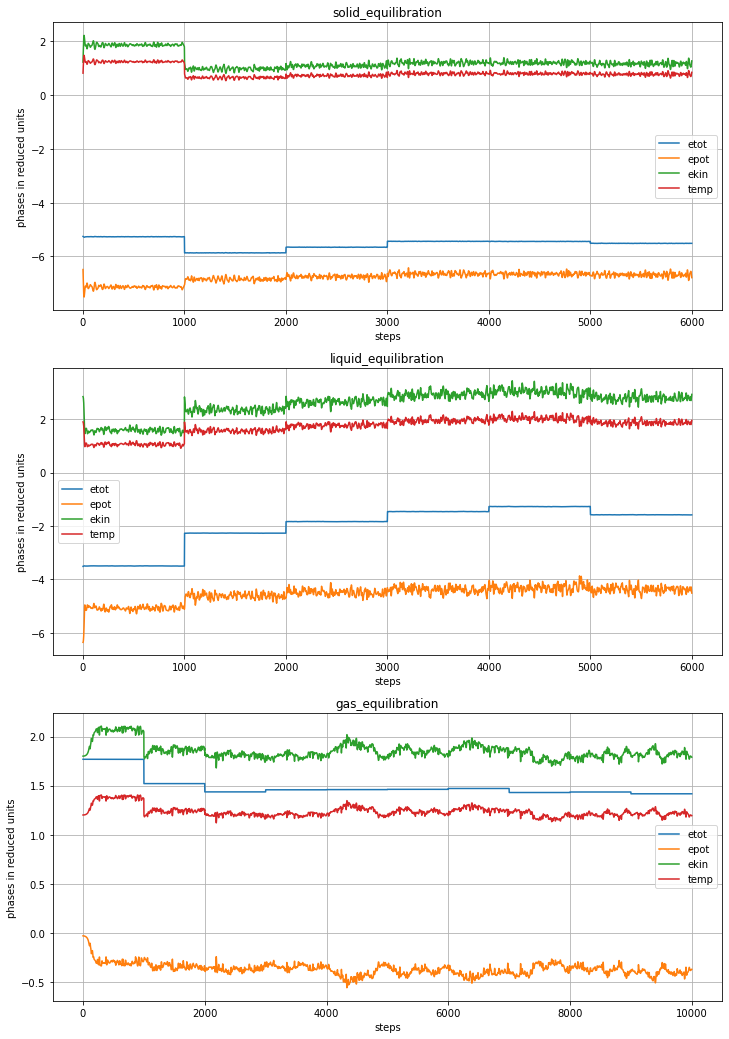

In [2]:
states = ["solid","liquid","gas"]
fig, axx = plt.subplots(3, 1,figsize=(12, 18))
axx = axx.reshape(-1)
for j in range(3):
    etot = np.loadtxt("equilibration/output_etot_"+states[j]+".dat", usecols = (0))
    epot = np.loadtxt("equilibration/output_epot_"+states[j]+".dat", usecols = (0))
    ekin = np.loadtxt("equilibration/output_ekin_"+states[j]+".dat", usecols = (0))
    temp = np.loadtxt("equilibration/output_temp_"+states[j]+".dat", usecols = (0))

    measures = [etot, epot, ekin, temp]
    labels = ["etot", "epot", "ekin", "temp"]

    x = np.linspace(0, len(etot), len(etot))

    ax = axx[j]
    for i, mea in enumerate(measures):
        ax.errorbar(x, mea, label = labels[i])
    ax.set_title(states[j]+"_equilibration")
    ax.set_xlabel(f"steps")
    ax.set_ylabel(f"phases in reduced units")
    ax.grid(True)
    ax.legend(loc='best')
    #ax.legend(loc=(0.05, 0.4))

The figures above show the equilibration for the solid, liquid and gas. 6 cycles are represented for the solid and the liquid phase while 10 cyles are presented for the gas phase. Each cycle is made up of 1000 steps of the Verlet algorithm. It is clear that, while at the beginning of the first couple of cycles the phases abruptly shift , once the equilibrium is reached (~6 cycles for solid and liquid, ~10 for gas), the transition between two cycles is almost invisible. Moreover, in the end of the equilibration, the temperature is compatible with the one forced at the beginning of the first cycle.

To implement the rescaling of the velocities and the possibility to restart, two boolean variables were added to the set of parameters already needed to start a simulation. One implements the possibility to restart from an old configuration while the second one is useful to rescale the velocities during the equilibration phase.

The rescaling of the velocities has been implemented following the sugggestion in the instructions.

### EX04_3

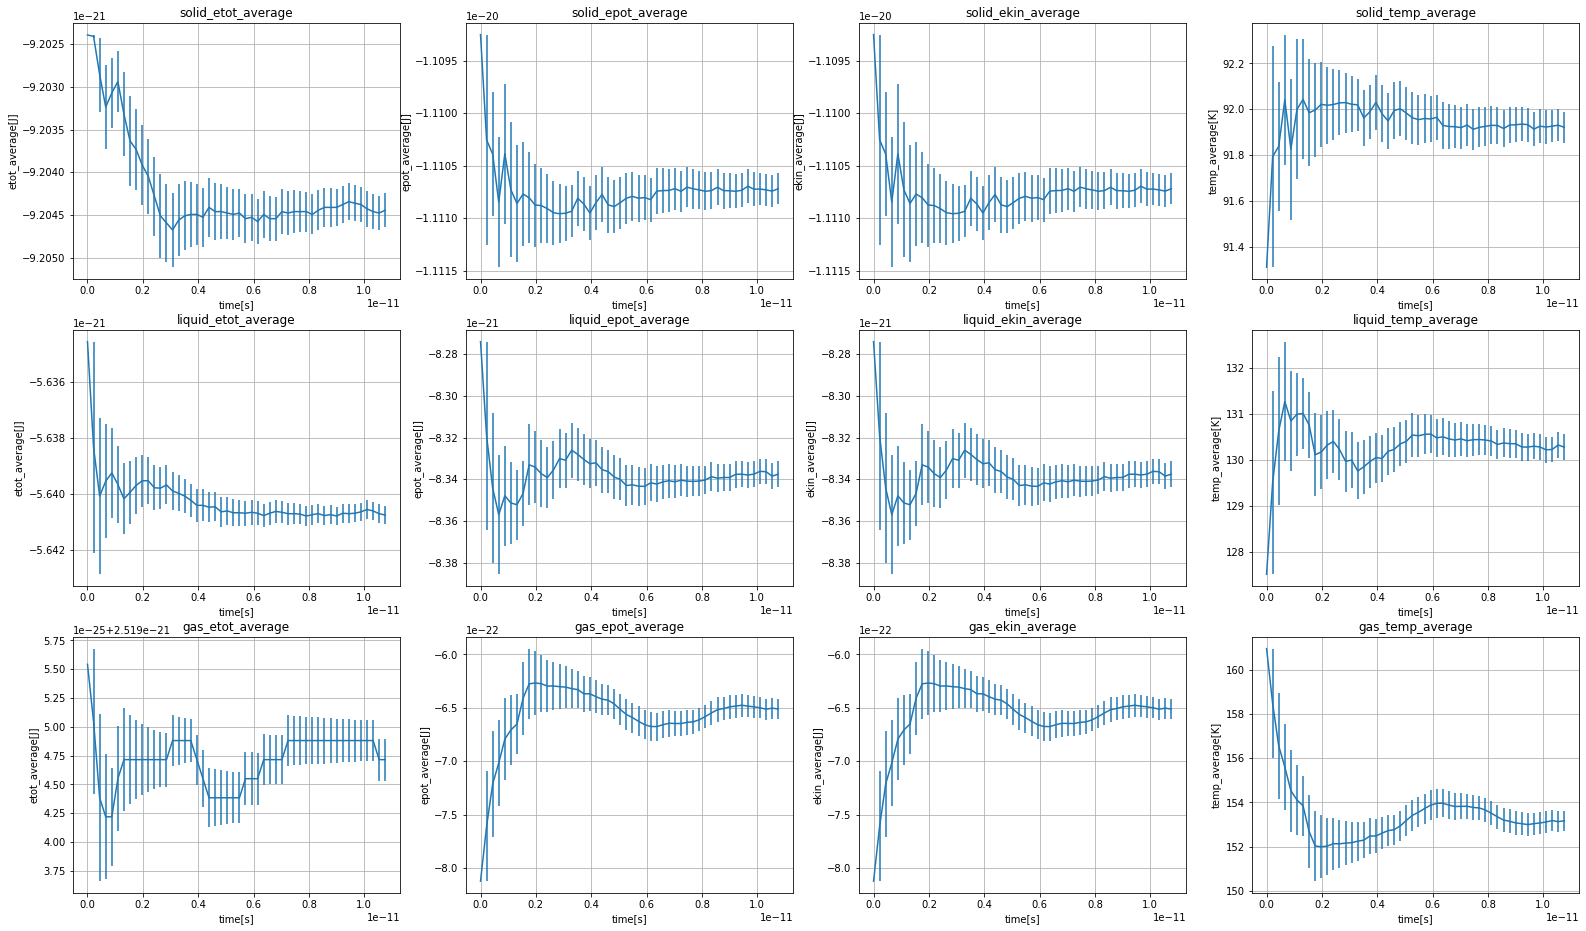

In [11]:
sigma = 0.34e-9
eps_over_kb = 120
m = 39.948*1.66e-27
kb = 1.38e-23

# 5 cycles to equilibrate
fs = [eps_over_kb*kb, eps_over_kb*kb, eps_over_kb*kb, eps_over_kb]
#fs = [1,1,1,1]
time_fs = 0.1*sigma*np.sqrt(m/eps_over_kb/kb)
#time_fs = 1
units = ["J", "J", "J", "K"]
state = ["solid","liquid","gas"]
labels = ["etot", "epot", "ekin", "temp"]
fig, axx = plt.subplots(3, 4,figsize=(27,16) )
axx = axx.reshape(-1)
for j in range(len(state)):
    for i in range(4):
        en, en_err = np.loadtxt(state[j]+"_argon/average_"+labels[i]+".out", unpack = True, usecols = (2,3))
        #en, en_err = np.loadtxt("gas_argon/average_"+labels[i]+".out", unpack = True, usecols = (2,3))

        x = np.linspace(0, len(en), len(en_err))

        ax = axx[4*j+i]
        ax.errorbar(x*time_fs, en*fs[i], en_err*fs[i])
        ax.set_title(state[j]+"_"+labels[i]+"_average")
        ax.set_xlabel(f"time[s]")
        ax.set_ylabel(labels[i]+f"_average[{units[i]}]")
        ax.grid(True)

In [4]:
temp = [0.8, 1.1, 1.2]
for i in range(3):
    print(state[i]+" argon ideal temp: "+str(temp[i]*eps_over_kb)+" K\n")

solid argon ideal temp: 96.0 K

liquid argon ideal temp: 132.0 K

gas argon ideal temp: 144.0 K



In this set of graphs all the progressive means of interest are represented for solid, liquid and gas argon. All the quantities are expressed in SI units (one can change to reduced units uncommenting two rows of the python code). The equilibration has been achived by cycling the algorithm for 10 times (to be sure) rescaling the velocities for the solid and liquid while for the gas phase 15 cycles were needed. After the equilibration, the measures of the progressive means were done in blocks of 1000 for 50 blocks (without rescaling velocities).

Above the ideal temperatures in SI units are also indicated. As it can be seen from the graphs, none of the three phases reaches temperatures statistically compatible with the ideal ones. The difference between the two goes from some kelvin for solid and liquid to around ten kelvin for gas.